In [4]:
import networkx as nx
import numpy as np

# Potts MRF with chain structure

In [79]:
def random_unaries(n_variables, unaries_high, unaries_low):
    # list of random unaries unaries
    n_states = 2
    unaries = np.random.rand(n_states, n_variables)
    unaries = (unaries_high-unaries_low) * unaries + unaries_low # normalise
    unaries = np.append(unaries, 0)  # for last variable
    return unaries
    

# function to solve a 1D Potts MRF using Dijkstra's algorithm on an auxiliary graph
def solve_chain(n_variables, unaries, beta, draw=False):
    n_states = 2

    # Since our graph allows only paths of equal length from start to end,
    # we can simply add a constant offset to all weights in order to cater 
    # for negative weights.
    # Seeing that both binary and unary factors are between -1 and 1, we can
    # set this to 2.
    offset = 1-np.min(unaries)

    # set up auxiliary graph using networkx
    G = nx.Graph()
    
    # set up entrance to graph
    for state_fin in range(n_states):
        G.add_edge('start', '0 ' + str(state_fin), weight=unaries[0] + offset)

    for i in range(n_variables - 1):
        for state_in in range(n_states):
            for state_fin in range(n_states):
                if state_fin == 1:
                    weight = unaries[i + 1] # include unary energies
                else: 
                    weight = 1-unaries[i+1]
                if state_fin != state_in:
                    weight = weight + beta # include binary (Potts) energies
                G.add_edge(str(i) + ' ' + str(state_in),
                           str(i + 1) + ' ' + str(state_fin),
                           weight=weight + offset)

    # set up exit from graph
    for state_in in range(n_states):
        G.add_edge(str(n_variables - 1) + ' ' + str(state_in),
                   'end', weight=0 + offset)  
        # we actually don't need the offset here

    # find shortest path through the auxiliary graph using Dijkstra's algorithm
    res = nx.dijkstra_path(G, 'start', 'end')

    if draw:
        draw_graph_result(G, res)

    # extract the useful information
    res = res[1:-1] # get rid of start and end elements
    res = [s[-1:] for s in res] # get rid of enumerating part in the variable names

    return res


In [101]:
# function to draw an auxiliary graph:
def draw_graph_result(G, result):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))

    e_selected = []
    for i, node in enumerate(result):
        if i > 0:
            e_selected.append((result[i-1], node))
            
    esmall = [(u, v) for (u, v, d) in G.edges(data=True)
              if (u, v) not in e_selected]
    
    pos=nx.shell_layout(G, nlist=[
        ['start', 'end'],
        [n for n in G.nodes() if n.endswith(' 0')],
        [n for n in G.nodes() if n.endswith(' 1')],
    ])

    # nodes
    nx.draw_networkx_nodes(G,pos,node_size=700)

    # edges
    nx.draw_networkx_edges(G,pos, edgelist=e_selected, width=3)
    nx.draw_networkx_edges(G,pos, edgelist=esmall, width=2,
                           alpha=0.5, edge_color='b', style='dashed')

    # labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.axis('off')
    plt.show() # display

beta = 0.01


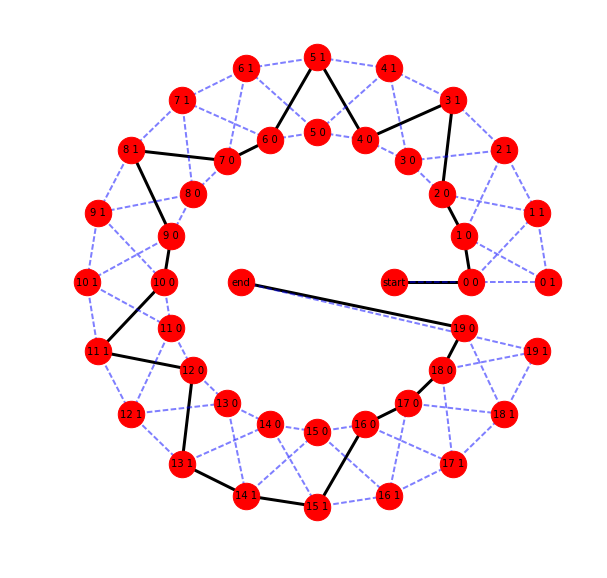

['0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0']
beta = 0.1
['0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0']
beta = 0.2
['0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0']
beta = 0.5
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0']
beta = 1.0
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0']


In [102]:
# Unary energies in [0,1]:
unaries = random_unaries(n_variables=20, unaries_low=0, unaries_high=1)
for beta in [0.01, 0.1, 0.2, 0.5, 1.0]:
    print ('beta = '+str(beta))
    print(solve_chain(n_variables=20, unaries=unaries, beta=beta,
                      draw=(beta == 0.01)))

In [103]:
# unary energies in [-1,1]
# This only works because our solve_chain function automatically adds an offset
unaries = random_unaries(n_variables=20, unaries_low=-1, unaries_high=1)
for beta in [-1.0, -0.1, -0.01, 0.01, 0.1, 0.2, 0.5, 1.0]:
    print('beta = ' + str(beta))
    print(solve_chain(n_variables=20, unaries=unaries, beta=beta))

beta = -1.0
['0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0']
beta = -0.1
['0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0']
beta = -0.01
['0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0']
beta = 0.01
['1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0']
beta = 0.1
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0']
beta = 0.2
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0']
beta = 0.5
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
beta = 1.0
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


# Potts MRF with grid structure

In [53]:
n = 20 # grid dimension: number of variables in each row/column

unaries_high =  1
unaries_low  = 0
beta = -0.5

# define random unaries (2D array)
unaries = np.random.rand(n, n)
unaries = (unaries_high-unaries_low) * unaries + unaries_low # normalise

# split unaries into two random variables
unaries_h = np.random.rand(n,n)
unaries = (unaries_high-unaries_low) * unaries_h + unaries_low # normalise

unaries_v = unaries-unaries_h # such that unaries = unaries_v + unaries_h


E_h = np.ndarray([0, n])
for i in range(n):
    E_h = np.vstack((E_h, solve_chain(
        n_variables=n, unaries=unaries_h[i,:], beta=beta)))

E_v = np.ndarray([0, n])
for i in range(n):
    E_v = np.vstack((E_v, solve_chain(
        n_variables=n, unaries=unaries_v[:,i], beta=beta)))

print('vertical variable values:\n', E_v)
print('horizontal variable values:\n', E_h)

vertical variable values:
 [['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' 

## Interpretation

If $E(\hat X) <= E_h(\hat X^h) + \epsilon$ where $\epsilon >= 0$, then $\hat X$ would
be the true $\operatorname{argmin}_X$ of $E_h(X)$. This is therefore not possible.

$E(\hat X) >= E_h(\hat X^h) + E_v(\hat X^v)$ on the other hand is true. For the case that $\hat X^h = \hat X^v$, the grid can be viewed as a set of 1d chains which are not mutually interconnected.


## Bonus

In dual decomposition, we do not split the grid into a large number of independent chains, but in two trees. This is achieved by adding *one* of the horizontal rows to the *vertical* problem and vice-versa. This should leed to more agreement between the solutions.